![DrivenData Logo](https://s3.amazonaws.com/drivendata-public-assets/logo-white-blue.png)

In [1]:
from __future__ import print_function

import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

PROJ_ROOT = os.path.join(os.pardir)

print(os.path.abspath(PROJ_ROOT))

/home/laz/repos/data-science-is-software


# The [watermark](https://github.com/rasbt/watermark) extension

Tell everyone when your notebook was run, and with which packages. This is especially useful for nbview, blog posts, and other media where you are not sharing the notebook as executable code.

In [2]:
!pip install watermark

  Using cached watermark-1.6.0-py3-none-any.whl
You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# once it is installed, you'll just need this in future notebooks:
%load_ext watermark

In [4]:
%watermark -a "Peter Bull" -d -t -v -p numpy,pandas

Peter Bull 2018-04-15 22:24:57 

CPython 3.6.4
IPython 6.2.1

numpy 1.14.1
pandas 0.22.0


In [5]:
%watermark?

## Laying the foundation

Continuum's `conda` tool provides a way to create [isolated environments](http://conda.pydata.org/docs/using/envs.html). In fact, you've already seen this at work if you followed the [pydata setup](https://github.com/drivendata/pydata-setup) instructions to setup your machine for this tutorial. The `conda env` functionality let's you created an isolated environment on your machine for 

 - Start from "scratch" on each project
 - Choose Python 2 or 3 as appropriate

To create an empty environment:

 - `conda create -n <name> python=3`

**Note: `python=2` will create a Python 2 environment; `python=3` will create a Python 3 environment.**


To work in a particular virtual environment:

 - `source activate <name>`
 
To leave a virtual environment:

 - `source deactivate`

**Note: on Windows, the commands are just `activate` and `deactivate`, no need to type `source`.**

There are other Python tools for environment isolation, but none of them are perfect. If you're interested in the other options, [`virtualenv`](https://virtualenv.pypa.io/en/stable/) and [`pyenv`](https://github.com/yyuu/pyenv) both provide environment isolation. There are _sometimes_ compatibility issues between the Anaconda Python distribution and these packages, so if you've got Anaconda on your machine you can use `conda env` to create and manage environments.

-------------------
 
**`#lifehack`: create a new environment for every project you work on**

------------


## The `pip` [requirements.txt](https://pip.readthedocs.org/en/1.1/requirements.html) file

It's a convention in the Python ecosystem to track a project's dependencies in a file called `requirements.txt`. We recommend using this file to keep track of your MRE, "Minimum reproducible environment".

Conda

-----------

**`#lifehack`: never again run `pip install <package>`. Instead, update `requirements.txt` and run `pip install -r requirements.txt`**

-------


In [6]:
# what does requirements.txt look like?
print(open(os.path.join(PROJ_ROOT, 'requirements.txt')).read())

coverage>=4.0.3
engarde>=0.3.1
ipython>=4.1.2
matplotlib>=1.5.1
notebook>=4.1.0
numpy>=1.10.4
pandas>=0.17.1
seaborn>=0.7.0
q>=2.6
python-dotenv>=0.5.0
watermark>=1.3.0
pytest>=2.9.2
tqdm
jupyter
scikit-learn
scipy
nbdime
runipy



The format for a line in the requirements file is:

 | Syntax | Result |
 | --- | --- |
 | `package_name` | for whatever the latest version on PyPI is |
 | `package_name==X.X.X` | for an exact match of version X.X.X |
 | `package_name>=X.X.X` | for at least version X.X.X |
 
Now, contributors can create a new virtual environment (using conda or any other tool) and install your dependencies just by running:

 - `pip install -r requirements.txt`

--------------









-------------

# Let's get to the data!

We've got our environment set up, we're tracking the packages that we use, and we've got a standard folder structure. Now that all of that is working we can 


In [2]:
## Try adding parameter index=0
pump_data_path = os.path.join(PROJ_ROOT,
                              "data",
                              "raw",
                              "pumps_train_values.csv")

df = pd.read_csv(pump_data_path, index_col=0)
df.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [9]:
pd.read_csv?

In [3]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


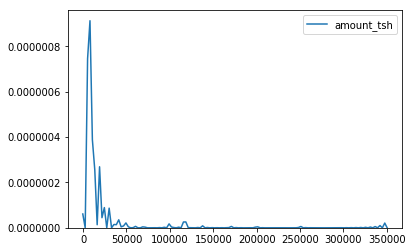

In [4]:
## Paste for 'construction_year' and plot
## Paste for 'gps_height' and plot
plot_data = df['amount_tsh']
sns.kdeplot(plot_data, bw=100)
plt.show()

In [12]:
def kde_plot(dataframe, variable, upper=None, lower=None, bw=0.1):
    """ Plots a density plot for a variable with optional upper and
        lower bounds on the data (inclusive).
    """
    plot_data = dataframe[variable]
    
    if upper is not None:
        plot_data = plot_data[plot_data <= upper]
    if lower is not None:
        plot_data = plot_data[plot_data >= lower]

    sns.kdeplot(plot_data, bw=bw)
    
    plt.savefig(os.path.join(PROJ_ROOT, 'reports', 'figures', '{}.png'.format(variable)))
    
    plt.show()

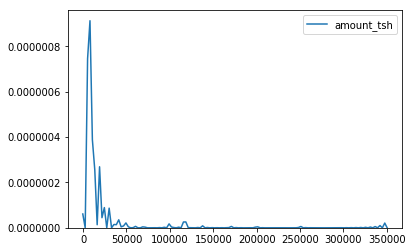

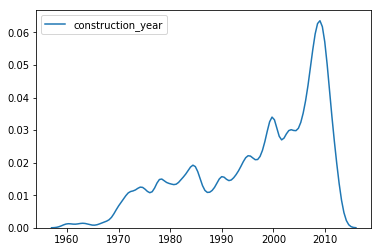

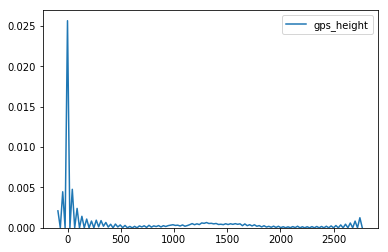

In [13]:
kde_plot(df, 'amount_tsh', bw=100, lower=0)
kde_plot(df, 'construction_year', bw=1, lower=1000, upper=2016)
kde_plot(df, 'gps_height', bw=0.1)

-------


-------


# Writing code for reproducibility

So, we've got some invalid data in this dataset. For example, water pumps installed before in the year 0. We'll want to have a function to load and clean this data since we will probably be using this data in multiple datasets.

Here's a first pass at a function that will do that for us. Now, we've got the function implemented in the notebook, but let's bring it to a standalone file.

We'll copy these functions into:
`src/features/build_features.py`

In [ ]:
def awesome_function(s):
    from IPython.display import display, HTML
    css = """
        .blink {
            animation-duration: 1s;
            animation-name: blink;
            animation-iteration-count: infinite;
            animation-timing-function: steps(2, start);
        }
        @keyframes blink {
            80% {
                visibility: hidden;
            }
        }"""

    to_show = HTML(
        '<style>{}</style>'.format(css) +
        '<p class="blink"> {} IS AWESOME!!!!! </p>'.format(s)
    )
    display(to_show)


def remove_invalid_data(path):
    """ Takes a path to a water pumps csv, loads in pandas, removes
        invalid columns and returns the dataframe.
    """
    df = pd.read_csv(path, index_col=0)

    # preselected columns
    useful_columns = ['amount_tsh',
                      'gps_height',
                      'longitude',
                      'latitude',
                      'region',
                      'population',
                      'construction_year',
                      'extraction_type_class',
                      'status_group',
                      'management_group',
                      'quality_group',
                      'source_type',
                      'waterpoint_type']

    df = df[useful_columns]

    invalid_values = {
        'amount_tsh': {0: np.nan},
        'longitude': {0: np.nan},
        'installer': {0: np.nan},
        'construction_year': {0: np.nan},
    }

    # drop rows with invalid values
    df.replace(invalid_values, inplace=True)

    # drop any rows in the dataset that have NaNs
    df.dropna(how="any")

    # create categorical columns
    for c in df.columns:
        if df[c].dtype == 'object':
            df[c] = df[c].astype('category')

    df.drop('status_group')

    return pd.get_dummies(df)

# Loading local development files

If I'm just loading local python files that I expect to use in this project, I often just add the `src` folder to the Python path using `sys.path.append`. This tells Python to look in that folder for modules that we can import. This works well for local code and notebooks.

In [6]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
from features.build_features import remove_invalid_data
from features.build_features import awesome_function

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# edit function in file!
awesome_function("ODSC")

In [ ]:
df = remove_invalid_data(pump_data_path)

In [ ]:
%debug

> /home/laz/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py(1269)_convert_to_indexer()
   1267                 if mask.any():
   1268                     raise KeyError('{mask} not in index'
-> 1269                                    .format(mask=objarr[mask]))
   1270 
   1271                 return _values_from_object(indexer)

ipdb> u
> /home/laz/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py(2177)_getitem_array()
   2175             return self._take(indexer, axis=0, convert=False)
   2176         else:
-> 2177             indexer = self.loc._convert_to_indexer(key, axis=1)
   2178             return self._take(indexer, axis=1, convert=True)
   2179 

ipdb> u
> /home/laz/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py(2133)__getitem__()
   2131         if isinstance(key, (Series, np.ndarray, Index, list)):
   2132             # either boolean or fancy integer index
-> 2133             return self._getitem_array(key)
   2134         elif isinstan

As mentioned in the slides, using `sys.path.append` is not the best way to distribute code that you want to run on other machines. For that, create a real Python package that can be separately developed, maintained, and deployed.

We can build a python package to solve that! In fact, there is a cookiecutter to create Python packages.
Once we create this package, we can install it in "editable" mode, which means that as we change the code the changes will get picked up if the package is used. The process looks like:

    cookiecutter https://github.com/wdm0006/cookiecutter-pipproject
    cd package_name
    pip install -e .

Now we can have a separate repository for this code and it can be used across projects without having to maintain code in multiple places.

-------------------------

------------------------

# Let's train a model!

Now, we'll use `sklearn` to train a machine learning model. We'll just do a simple logistic regression model, and for fun we'll use `PolynomialFeatures` to generate interaction terms. 


#### #lifehack: if something goes wrong use `%debug` !

In [ ]:
%%time
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

df = remove_invalid_data(pump_data_path)

labels = (pd.read_csv(os.path.join(PROJ_ROOT, 'data', 'raw', 'pumps_train_labels.csv'),
                     index_col=0)
            .loc[df.index])

pl = Pipeline([
    ('interactions', PolynomialFeatures(degree=2)),
    ('clf', LogisticRegression())
])

pl.fit(df, labels)

In [ ]:
pl.predict(df)

#### #lifehack: if something takes a long time use `%%prun` !

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig(os.path.join(PROJ_ROOT, "reports", "figures", "confusion_matrix.png"))
    plt.show()

In [ ]:
cm = confusion_matrix(labels, clf.predict(df),
                 labels=['functional', 'non functional', 'functional needs repair'])

plot_confusion_matrix(cm,
                      ['functional', 'non functional', 'functional needs repair'])

# Now let's see what we've put together!

In [ ]:
!tree {PROJ_ROOT}